## Problem statement
We have got a dataset about customer feedback from fastest growing startups in logistics and deliver domain. The dataset contains different features listed below and need to predict if customer is happy or not with the services being provided. 

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

The dataset is from a recent customer survey and we need to make predictions bsed on given data. 


### Data Description:

- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
-  X1 = my order was delivered on time.
-  X2 = contents of my order was as I expected
-  X3 = I ordered everything I wanted to order
-  X4 = I paid a good price for my order
-  X5 = I am satisfied with my courier
-  X6 = the app makes ordering easy for me


In [ ]:
## adding required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## loading customer data into dataframe
customer_df = pd.read_csv('../data/ACME-HappinessSurvey2020.csv')
customer_df.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### Exploratory data analysis:

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
customer_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
features_info = []
features = ['X1','X2','X3','X4','X5','X6']
features_info = [ ]
for feature in features:
    #  print(f'mean of {feature}:')
    #  print(customer_df[feature].mean())
    #  print(f"median of {feature}:")
    #  print(customer_df[feature].median())
    #  print(f"mode of {feature}:")
    #  print(customer_df[feature].mode()[0])
     features_info.append({
          'feature': feature,
            'mean': customer_df[feature].mean(),
            'median': customer_df[feature].median(),
            'mode': customer_df[feature].mode()[0]
        })
     


In [23]:
features_info_df = pd.DataFrame(features_info)
features_info_df.head(10)

,feature,mean,median,mode
0,X1,4.333333,5.0,5
1,X2,2.531746,3.0,3
2,X3,3.309524,3.0,3
3,X4,3.746032,4.0,4
4,X5,3.650794,4.0,4
5,X6,4.253968,4.0,5


In [25]:
# writing to a csv file under reports folder
features_info_df.to_csv('../reports/feature_stats.csv', index=False)

In [26]:
print(features_info_df)

  feature      mean  median  mode
0      X1  4.333333     5.0     5
1      X2  2.531746     3.0     3
2      X3  3.309524     3.0     3
3      X4  3.746032     4.0     4
4      X5  3.650794     4.0     4
5      X6  4.253968     4.0     5


In [24]:
## checking for null values

customer_df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

### No null values reported

Text(0, 0.5, 'Number of Customers')

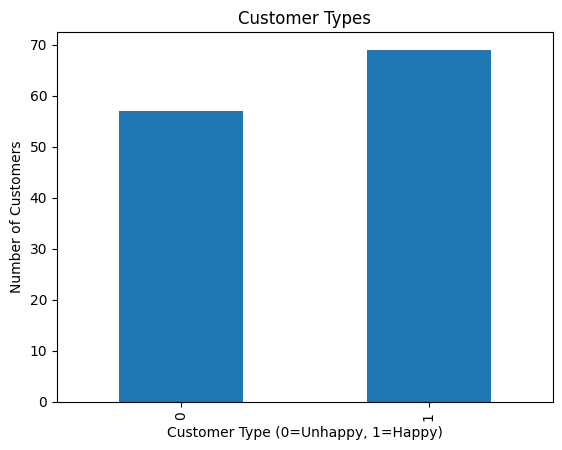

In [101]:
customer_type_df=customer_df.groupby('Y').size()
customer_type_df.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('Customer Type (0=Unhappy, 1=Happy)')
plt.ylabel('Number of Customers')

In [102]:
print(customer_type_df)

Y
0    57
1    69
dtype: int64


In [93]:
print("happy customers:", customer_type_df[1])
print("unhappy customers:",customer_type_df[0])



happy customers: 69
unhappy customers: 57


Text(0.5, 0, 'Customer Type (0=Unhappy, 1=Happy)')

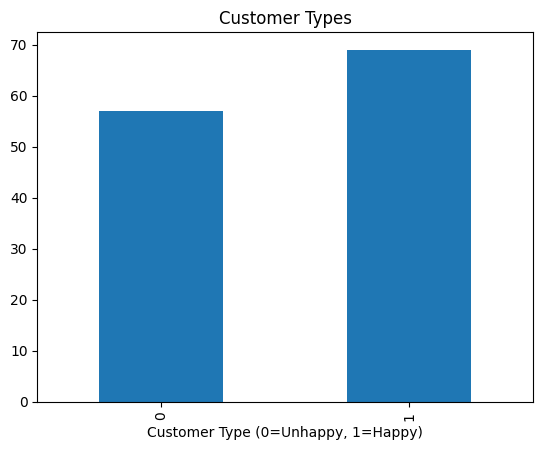

In [96]:
#customer_type_df=customer_type_df.size()
customer_type_df.plot(kind='bar')
plt.title('Customer Types')
plt.xlabel('Customer Type (0=Unhappy, 1=Happy)')